In [ ]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Colab Notebooks'


# Weights & Biases (W&B) Logging Tutorial for PyTorch

This tutorial demonstrates how to use Weights & Biases (W&B) for experiment tracking and visualization, first with a simple loop, and then with a basic PyTorch neural network for sine wave approximation.

W&B helps you track:
* **Metrics:** Loss, accuracy, F1 score, etc.
* **Hyperparameters:** Learning rate, batch size, optimizer, etc.
* **Model Artifacts:** Save model checkpoints.
* **System Metrics:** CPU/GPU utilization, memory usage.
* **Media:** Images, videos, audio, custom plots.

To get started, you'll need to install `wandb`:
```bash
pip install wandb torch torchvision torchaudio
```
You will also need to log in to your W&B account. Run `wandb login` in your terminal or uncomment and run `wandb.login()` in a code cell.

## Part 1: Basic Logging with a For Loop

In this section, we'll demonstrate the fundamental `wandb.init()` and `wandb.log()` functions. 

**`wandb.init()`**: This function initializes a new W&B run. A 'run' is a single execution of your code, typically corresponding to one experiment. You can specify a `project` name to group related runs and a `name` for the specific run to easily identify it later. If you don't specify these, W&B will generate default names.

**`wandb.log()`**: This function is used to log data to the current W&B run. It takes a dictionary where keys are the names of the metrics/data you want to log (e.g., `'loss'`, `'accuracy'`) and values are their corresponding numerical values. W&B automatically plots these values over time (steps or epochs).

In [ ]:
import wandb
import random

# Optional: Uncomment the line below to log in if you haven't already
# wandb.login()

# 1. Initialize a new W&B run
# We give it a project name and a specific run name for easy identification.
wandb.init(project="simple-logging-tutorial", name="for-loop-example")

print("Starting basic logging example...")

# Simulate a training process with a simple for loop
for i in range(100):
    # Simulate a decreasing loss and increasing accuracy
    simulated_loss = 100 / (i + 1) + random.uniform(-0.5, 0.5)
    simulated_accuracy = 0.5 + (i / 100) * 0.4 + random.uniform(-0.02, 0.02)

    # 2. Log metrics to W&B
    # The dictionary keys will be the names of your plots in the W&B UI.
    wandb.log({"simulated_loss": simulated_loss, "simulated_accuracy": simulated_accuracy})

    if i % 20 == 0:
        print(f"Step {i}: Loss = {simulated_loss:.2f}, Accuracy = {simulated_accuracy:.2f}")

print("Basic logging example finished. Check your W&B dashboard!")

# Finish the W&B run
wandb.finish()

## Part 2: Sine Wave Approximation with PyTorch and W&B

Now, let's apply W&B logging to a more realistic scenario: training a simple neural network to approximate a sine wave. We'll generate synthetic data, define a small PyTorch model, and then train it while logging training, validation, and test performance.

Generating sine wave data...
Train samples: 700
Validation samples: 150
Test samples: 150


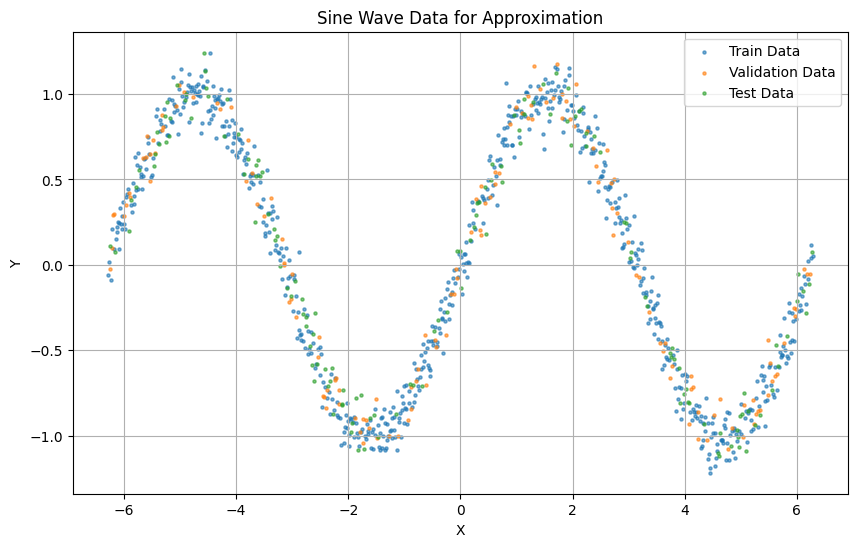

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# --- 1. Data Generation ---
print("Generating sine wave data...")

# Generate x values
X = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1).astype(np.float32)
# Generate y values (sine wave with some noise)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape).astype(np.float32)

# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# --- 2. Data Splitting ---
# Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# Optional: Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), label='Train Data', s=5, alpha=0.6)
plt.scatter(X_val.numpy(), y_val.numpy(), label='Validation Data', s=5, alpha=0.6)
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test Data', s=5, alpha=0.6)
plt.title('Sine Wave Data for Approximation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import torch.nn as nn

# --- 3. Define a Simple Neural Network ---
print("Defining the neural network...")

class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        # A very simple network with two hidden layers
        self.fc1 = nn.Linear(1, 64)  # Input: 1 feature (X), Output: 64 features
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64) # Input: 64 features, Output: 64 features
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)  # Input: 64 features, Output: 1 feature (Y)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = SineApproximator()
print("Model architecture:")
print(model)


Defining the neural network...
Model architecture:
SineApproximator(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


Starting training with W&B logging...


/home/kbhau001/anaconda3/envs/mm_bench/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [50/500], Train Loss: 0.2016, Val Loss: 0.1880
Epoch [100/500], Train Loss: 0.1263, Val Loss: 0.1247
Epoch [150/500], Train Loss: 0.1108, Val Loss: 0.1087
Epoch [200/500], Train Loss: 0.0907, Val Loss: 0.0880
Epoch [250/500], Train Loss: 0.0699, Val Loss: 0.0673
Epoch [300/500], Train Loss: 0.0503, Val Loss: 0.0487
Epoch [350/500], Train Loss: 0.0362, Val Loss: 0.0357
Epoch [400/500], Train Loss: 0.0253, Val Loss: 0.0254
Epoch [450/500], Train Loss: 0.0177, Val Loss: 0.0181
Epoch [500/500], Train Loss: 0.0131, Val Loss: 0.0140
Training finished.
Evaluating on test set...
Final Test Loss: 0.0144


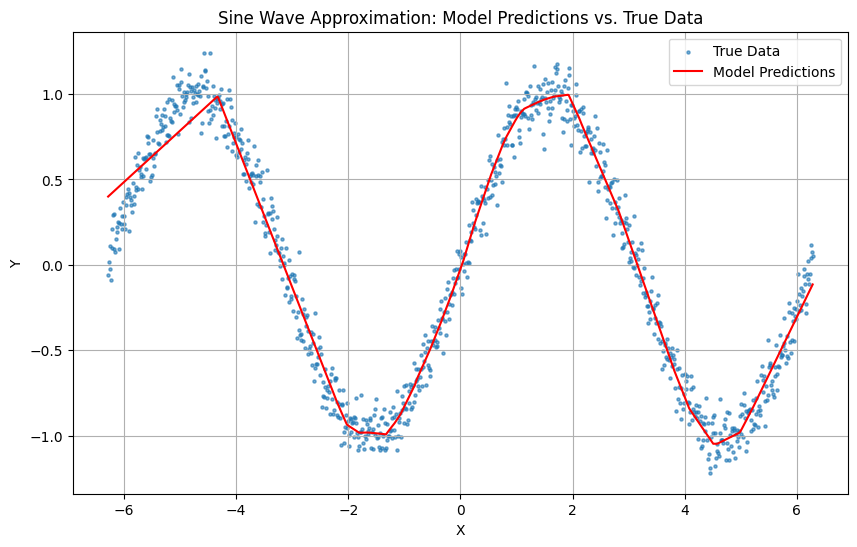

epoch,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▇▇█████
final_test_loss,▁
train_loss,██▇▅▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▇▅▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,499
final_test_loss,0.01443
train_loss,0.01307
val_loss,0.01396


Tutorial complete. Check your W&B dashboard for detailed logs!


In [4]:
import torch
import torch.nn as nn
import wandb

# Ensure previous W&B run is finished if any
if wandb.run is not None:
    wandb.finish()

# --- 4. Training, Validation, and Testing with W&B Logging ---
print("Starting training with W&B logging...")

# Define hyperparameters
config = {
    "learning_rate": 0.001,
    "epochs": 500,
    "batch_size": 32, # Not strictly used for full batch, but good to define
    "optimizer": "Adam",
    "loss_function": "MSELoss"
}

# Initialize W&B run for this training experiment
wandb.init(
    project="pytorch-sine-approximation",  # Group related runs
    name="simple-sine-model-run",          # Specific name for this run
    config=config                          # Log hyperparameters
)

# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error is good for regression tasks
optimizer = torch.optim.Adam(model.parameters(), lr=wandb.config.learning_rate)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training Loop
for epoch in range(wandb.config.epochs):
    # --- Training Step ---
    model.train() # Set model to training mode
    optimizer.zero_grad() # Clear gradients
    outputs = model(X_train) # Forward pass
    train_loss = criterion(outputs, y_train) # Calculate loss
    train_loss.backward() # Backward pass (calculate gradients)
    optimizer.step() # Update weights

    # --- Validation Step ---
    model.eval() # Set model to evaluation mode
    with torch.no_grad(): # Disable gradient calculation for validation
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)

    # Log metrics to W&B
    wandb.log({
        "epoch": epoch,
        "train_loss": train_loss.item(),
        "val_loss": val_loss.item()
    })

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{wandb.config.epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print("Training finished.")

# --- 5. Final Test Performance ---
print("Evaluating on test set...")
model.eval() # Set model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)

print(f'Final Test Loss: {test_loss.item():.4f}')

# Log final test loss to W&B
wandb.log({"final_test_loss": test_loss.item()})

# Optional: Plot the model's predictions against the actual data
model.eval()
with torch.no_grad():
    predicted_y = model(X_tensor.to(device)).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X_tensor.numpy(), y_tensor.numpy(), label='True Data', s=5, alpha=0.6)
plt.plot(X_tensor.numpy(), predicted_y, color='red', label='Model Predictions')
plt.title('Sine Wave Approximation: Model Predictions vs. True Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

wandb.log({"sine_approximation_plot": wandb.Image(plt)})

# Close the plot to prevent it from displaying locally if running in a script
plt.close()

# Finish the W&B run
wandb.finish()

print("Tutorial complete. Check your W&B dashboard for detailed logs!")